# 06. R과 시각화

* 코난아카데미 : 데이터분석 기초
* 작성자 : 김무성

# 차례

* R 기본 그래픽스
* ggplot2 

# 추천 사이트

* ggplot2 - http://docs.ggplot2.org/current/

# 추천 자료

# R 기본 그래픽스

# ggplot2

* ggplot2 기본 개념
* Bar Graphs
* Line Graphs
* Scatter Plots
* Summarized Data Distributions
* Annotations
* Axes
* Controlling the Overall Appearance of Graphs
* Legends
* Facets
* Using Colors in Plots

In [3]:
library(ggplot2)

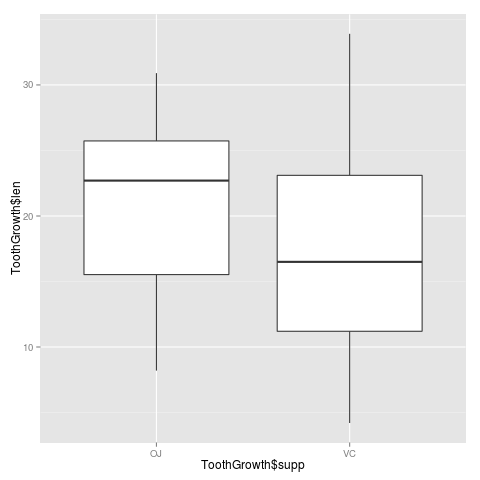

In [4]:
qplot(ToothGrowth$supp, ToothGrowth$len, geom="boxplot")

In [4]:
head(ToothGrowth)

   len supp dose
1  4.2   VC  0.5
2 11.5   VC  0.5
3  7.3   VC  0.5
4  5.8   VC  0.5
5  6.4   VC  0.5
6 10.0   VC  0.5

In [5]:
str(ToothGrowth)

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...


## ggplot2 기본 개념

In [ ]:
# install.packages("ggplot2")
# 


## Bar Graphs

In [7]:
# install.packages("gcookbook") # 참고문헌의 예제

library(ggplot2)
library(gcookbook)

In [8]:
pg_mean

  group weight
1  ctrl  5.032
2  trt1  4.661
3  trt2  5.526

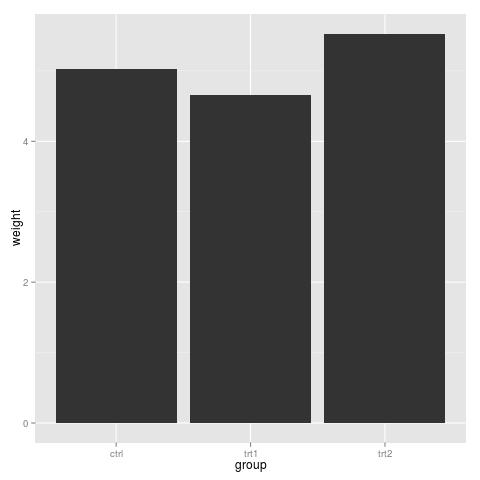

In [13]:
ggplot(pg_mean, aes(x=group, y=weight)) + 
        geom_bar(stat="identity")

In [14]:
BOD

  Time demand
1    1    8.3
2    2   10.3
3    3   19.0
4    4   16.0
5    5   15.6
6    7   19.8

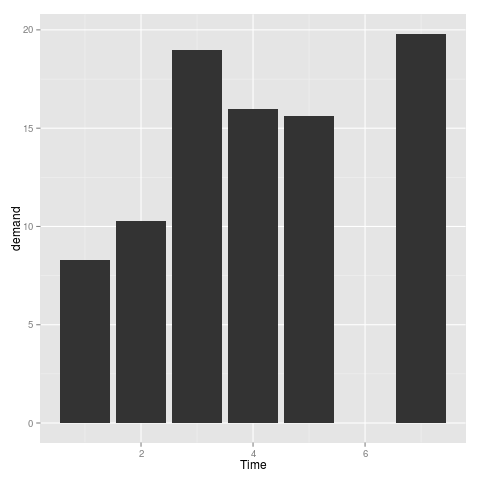

In [15]:
# Time이 연속형이라, 자료에 6이 없으면 x 축에 빈 값으로 표시됨.
ggplot(BOD, aes(x=Time, y=demand)) + 
    geom_bar(stat="identity")

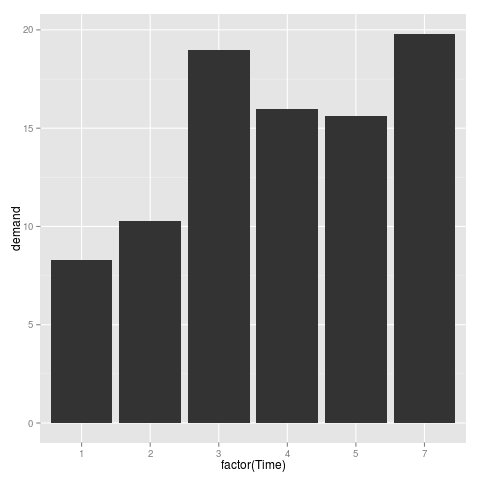

In [16]:
# 이때 Time을 factor 형태로 바꾸면 
ggplot(BOD, aes(x=factor(Time), y=demand)) + 
    geom_bar(stat="identity")

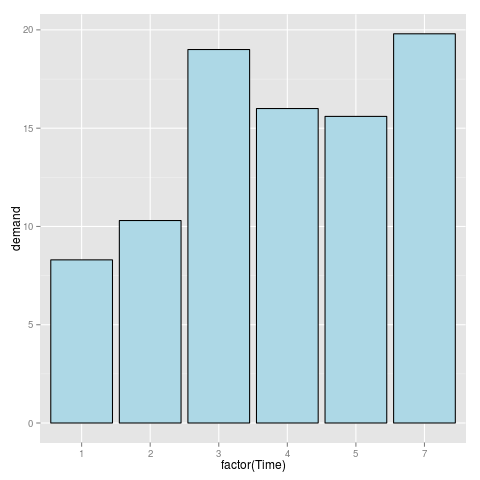

In [12]:
ggplot(BOD, aes(x=factor(Time), y=demand)) +  
    geom_bar(stat="identity", 
                 fill="lightblue",  # 막대색 설정
                 colour="black") # 막대 테두리 설정, colour 혹은 color

In [17]:
cabbage_exp

  Cultivar Date Weight        sd  n         se
1      c39  d16   3.18 0.9566144 10 0.30250803
2      c39  d20   2.80 0.2788867 10 0.08819171
3      c39  d21   2.74 0.9834181 10 0.31098410
4      c52  d16   2.26 0.4452215 10 0.14079141
5      c52  d20   3.11 0.7908505 10 0.25008887
6      c52  d21   1.47 0.2110819 10 0.06674995

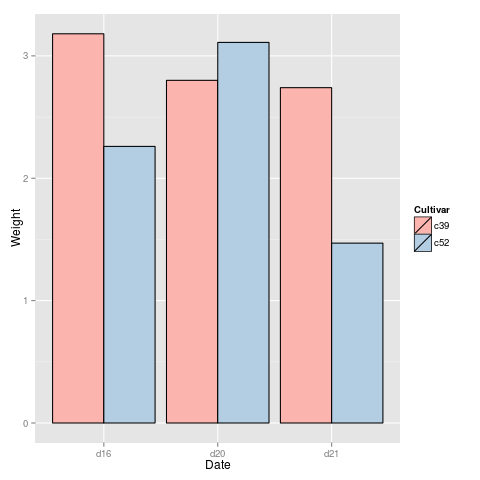

In [19]:
# 두 번째 변수를 기준으로 막대들을 묶어서 표현.
# Date를 x로 두고 Cultivar로 fill 색상을 결정하면, 하나의 Date에 Cultivar별로 색상이 다른 두개의 막대가 묶여서 그려짐.

ggplot(cabbage_exp, aes(x=Date, y=Weight, fill=Cultivar)) +
  geom_bar(position="dodge", colour="black", stat="identity") + 
  scale_fill_brewer(palette="Pastel1")

## Line Graphs

## Scatter Plots

## Summarized Data Distributions

## Annotations

## Axes

## Controlling the Overall Appearance of Graphs

## Legends

## Facets

## Using Colors in Plots

# 참고자료

* [1] Introduction to R Graphics with ggplot2 - http://www.slideshare.net/izahn/rgraphics-12040991